# Managing file paths

When working with data, it is important to keep track of where which input
files are stored, and where which output files should be written. This is
especially important when moving between computers or between virtual machines,
like, for instance, the CSC Notebooks platform. Using a distributed code
repository or versioning system, such as GitHub, adds another layer of
complexity: file paths should often be *relative* to the git repo, or to the
current file, as the repository can be cloned to any location on a different
computer (and already a different user name on your school and personal
computers might break things).

Earlier, file paths have often been hard-coded strings, text values. If, for
instance, an output file name had to be derived from an input file name, all
kind of slicing and other string manipulation methods would be used. More
recently, the `os.path` module of Python became popular, that allowed to split
a path into directories, and file names into base names and file extensions.
However, manipulating file paths still required knowledge about the computer a
script would ultimately run on. For instance, on all Unix-based operating
systems, such as Linux or MacOS, directories are separated by forward-slashes
(`/`), while Microsoft Windows uses back-slashes (`\`) (this particular problem
can be worked around with `os.sep` and `os.path.join`, but not in a very
convenient way). 

Since Python 3.4 (so, fairly recently), there exists a built-in module that
eases much of the hassle with managing file paths:
[`pathlib`](https://docs.python.org/3/library/pathlib.html). It provides an
abstract layer on top of the actual operating system file paths that is
consistent across computers. A `pathlib.Path()` object can be initiated with a
file path (as a `str`), when created without an argument, it refers to the
directory of the script or notebook file.

In [1]:
import pathlib
pathlib.Path()

WindowsPath('.')

So far, this path is not checked against the actual directory structure, but we
can `resolve()` it to convert it into an absolute path:

In [2]:
path = pathlib.Path()
path = path.resolve()
path

WindowsPath('C:/developerZone/clones/autogis/Lesson_transfer/Lessons/lesson-2')

:::{note}

This path has now been expanded to reflect the directory structure of the
computer it was run on. Most likely, the copy you are reading right now has
been generated on [readthedocs.io](https://readthedocs.io/) servers, and the
*‘current working directory’* is in a location you would not have expected.
:::


This path object now has a number of properties and methods. For instance, we
can test whether the path exists in the file system, or whether it is a
directory:

In [3]:
path.exists()

True

In [4]:
path.is_dir()

True

We could also rename or delete the path (but let’s not do this with the course
content!):

In [ ]:
# path.rename("new name")

# path.unlink()  # delete if path is a file
# path.rmdir()  # delete if path is a directory

Finally, to traverse within this path, you don’t have to think of whether you
are running the script on Windows or Linux, and you most definitely don’t have
to use string manipulation. To refer to a directory inside `path`, use the `/`
(division operator) to append another path component (can be a string). For
instance, to refer to a folder `data` within the same directory as this
notebook, write the following:

In [5]:
data_directory = path / "data"
data_directory

WindowsPath('C:/developerZone/clones/autogis/Lesson_transfer/Lessons/lesson-2/data')

To refer to ‘one directory up’ from a path, use its `.parent` property:

In [6]:
path.parent

WindowsPath('C:/developerZone/clones/autogis/Lesson_transfer/Lessons')

`Path()` objects can be used (almost) anywhere a file path is expected as a
variable of type `str`, as it automatically *typecasts* (converts) itself to a
suitable type.

In data science projects, it is a good habit to define a constant at the beginning of each notebook that points to the data directory, or multiple constants to point to, for instance, input and output directories. In today’s exercises we use different sample data sets from files stored in the same *data directory*. At the top of the notebooks, we thus define a constant `DATA_DIRECTORY` that we can later use to find the sample data set files:

In [8]:
# location (directory) of the notebook
import pathlib
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"

<Axes: >

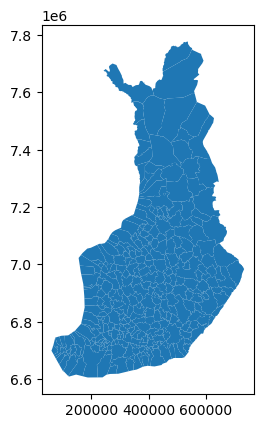

In [9]:
# this can then be used, for instance, in `geopandas.read_file()` (see next section):
import geopandas
data_set = geopandas.read_file(DATA_DIRECTORY / "finland_municipalities" / "finland_municipalities_2021.gpkg")
data_set.plot()

:::{admonition} Constants?
:class: note

*Constants* are values that cannot be modified once they have been defined. This helps optimise programs’ speed and memory footprint, and also allows the programmer to rely on a constant having a valid value.

Python does not know the concept of a constant, per-se. However, there is a convention to treat variables with an all-uppercase name as constants (e.g., they should not be modified).
:::

:::{caution}

In the examples above, we used a path that we `resolve()`d earlier on. This
further improves compatilibity and consistency across operating systems and
local installations. 

Especially when using the path of the current file (as in `pathlib.Path()`
without parameters), we recommend to resolve the path before traversing into
any other directory.
:::